Cada coluna (feature) no conjunto de dados representa uma característica de cada passageiro a bordo.

PassengerId: Um identificador único para cada passageiro.

Survived: O principal dado de resultado. Indica se o passageiro sobreviveu (1) ou não (0).

Pclass: A classe do bilhete do passageiro. É uma variável categórica que pode indicar a classe social ou econômica (1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe).

Name: O nome completo do passageiro.

Sex: O sexo do passageiro (masculino ou feminino).

Age: A idade do passageiro em anos. Esta coluna é a principal que contém valores ausentes.

SibSp: O número de irmãos/cônjuges a bordo com o passageiro.

Parch: O número de pais/filhos a bordo com o passageiro.

Ticket: O número do bilhete do passageiro.

Fare: O valor da tarifa paga pelo bilhete.

Cabin: O número da cabine do passageiro. Esta coluna contém uma grande quantidade de valores ausentes.

Embarked: O porto de embarque do passageiro. Os portos são identificados por letras: C = Cherbourg, Q = Queenstown, S = Southampton. Esta coluna também pode ter valores ausentes.

In [13]:
### 🧪 Kit Prático: Manipulação de Dados com Pandas I
# Tema: Explorando Dados do Titanic
# Ferramenta: Google Colab
# Dataset: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

import pandas as pd

# Passo 1: Carregar os dados
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Passo 2: Visualizar as 5 primeiras linhas do dataset
print("\n🔍 Primeiras linhas:")
print(df_titanic.head())

# Passo 3: Verificar o nome das colunas e tipos de dados
print("\n🧾 Informações do DataFrame:")
print(df_titanic.info())

# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas Descritivas para colunas numéricas:")
print(df_titanic.describe())

# Contagem de valores para uma coluna categórica (por exemplo, 'Survived')
print("\nContagem de sobreviventes (0 = Não, 1 = Sim):")
print(df_titanic['Survived'].value_counts())

# Passo 4: Filtrar apenas os passageiros que sobreviveram
sobreviventes = df_titanic[df_titanic['Survived'] == 1]
print("\n🛟 Passageiros que sobreviveram:")
print(sobreviventes.head())

# Passo 5: Criar um novo DataFrame com apenas colunas relevantes
resumo = df_titanic[['Name', 'Sex', 'Age', 'Survived']]
print("\n👤 Resumo com nome, sexo, idade e sobrevivência:")
print(resumo.head())

# Passo 6: Calcular a média de idade dos passageiros
media_idade = df_titanic['Age'].mean()
print(f"\n📊 Média de idade dos passageiros: {media_idade:.2f} anos")

# Passo 7: Filtrar passageiros do sexo feminino com menos de 18 anos
meninas = df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Age'] < 18)]
print("\n👧 Passageiras com menos de 18 anos:")
print(meninas[['Name', 'Age']])

tickets = df_titanic['Ticket']
print(f"Tickets {tickets}")

# DESAFIO EXTRA:
# Filtrar apenas os passageiros da 1ª classe que não sobreviveram
# Calcular a porcentagem desses em relação ao total da 1ª classe

# Quantos passageiros eram de cada sexo e de qual porto de embarque ?
# Qual é a idade média dos sobreviventes e dos não sobreviventes?



🔍 Primeiras linhas:
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S

🧾 Informações do DataFrame:
<class 'pandas.core.frame.

In [14]:
# Limpeza e Pré-processamento

# 1. Identificação e Remoção de Duplicatas
num_duplicatas = df_titanic.duplicated().sum()
if num_duplicatas > 0:
    df_limpo = df_titanic.drop_duplicates().copy()
    print(f"\nNúmero de linhas duplicadas: {num_duplicatas}")
    print(f"Dataset após a remoção de duplicatas. Novas dimensões: {df_limpo.shape}")
else:
    df_limpo = df_titanic.copy()
    print(f"\nNenhuma linha duplicada encontrada.")

# 2. Identificação de Valores Ausentes
print("\nValores ausentes por coluna (antes do tratamento):")
print(df_limpo.isnull().sum())

# 3. Tratamento de Valores Ausentes
# Tratar a coluna 'Age' (idade) com a mediana
mediana_idade = df_limpo['Age'].median()
df_limpo['Age'].fillna(mediana_idade, inplace=True)
print(f"\nValores ausentes na coluna 'Age' preenchidos com a mediana: {mediana_idade:.2f}")

# 4. Tratar a coluna 'Embarked' (porto de embarque) com o valor mais frequente
moda_embarque = df_limpo['Embarked'].mode()[0]
df_limpo['Embarked'].fillna(moda_embarque, inplace=True)
print(f"Valores ausentes na coluna 'Embarked' preenchidos com a moda: {moda_embarque}")

# 5. Para a coluna 'Cabin' (cabine), que tem muitos valores ausentes, vamos apenas indicar sua ausência
df_limpo['Cabin'].fillna('Missing', inplace=True)
print("Valores ausentes na coluna 'Cabin' preenchidos com 'Missing'.")

# 6. Verificação e Salvamento
print("\nVerificação final de valores ausentes:")
print(df_limpo.isnull().sum())

# Salvar o dataset limpo em um novo arquivo CSV (opcional)
# df_limpo.to_csv('titanic_limpo.csv', index=False)
# print("\nDataset limpo salvo como 'titanic_limpo.csv'.")

# Vasculhe os dados e encontre uma característica peculiar.

# A coluna Ticket tem muitos valores únicos. Tente analisar
#  os valores ausentes de uma forma diferente: o que aconteceria
#  se você simplesmente removesse todas as linhas que têm pelo
#  menos um valor ausente? Compare
#  o número de linhas restantes com o dataset original.

# Crie uma nova coluna chamada FamilySize que é a soma de
#   SibSp (irmãos/cônjuges) e Parch (pais/filhos). Depois,
#   calcule a média de sobrevivência para diferentes
#   tamanhos de família. O que você observa?


Nenhuma linha duplicada encontrada.

Valores ausentes por coluna (antes do tratamento):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores ausentes na coluna 'Age' preenchidos com a mediana: 28.00
Valores ausentes na coluna 'Embarked' preenchidos com a moda: S
Valores ausentes na coluna 'Cabin' preenchidos com 'Missing'.

Verificação final de valores ausentes:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-3129823696.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['Age'].fillna(mediana_idade, inplace=True)
/tmp/ipython-input-3129823696.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

## Informações Extras


Sendo você um gestor de seguro que assegurou o Titanic, qual o tipo de informação seria importante extrair dessa base de dados que o ajudaria a observar algum tipo de fraude.

1. Rastreamento por Bilhete (Ticket)

Informação a ser analisada: A coluna Ticket e, em particular, a quantidade de pessoas associadas a cada bilhete.

Análise de Fraude: Fraudes de seguro podem envolver pessoas que não estavam a bordo, mas que reivindicam um bilhete para receber indenização. Eu cruzaria os dados de todos os bilhetes associados a uma mesma família ou grupo e verificaria se o número de sobreviventes declarados corresponde ao número de passageiros que realmente embarcaram com aquele bilhete. Se houver discrepância — como uma família inteira declarada como morta, mas com um ou mais membros aparecendo em listas de sobreviventes — isso seria um alerta.

2. Padrões de Sobrevivência Inconsistentes

Informação a ser analisada: As colunas Survived, Age, Sex e Pclass.

Análise de Fraude: O padrão de sobrevivência no Titanic é bem conhecido: mulheres, crianças e passageiros da Primeira Classe tiveram taxas de sobrevivência muito maiores. Eu criaria relatórios para identificar:

Homens que sobreviveram: Se um homem da Terceira Classe, que teve as menores chances de sobrevivência, for listado como morto em uma reivindicação de seguro, mas aparecer como sobrevivente em outras listas ou testemunhos, isso levantaria uma bandeira vermelha.

Discrepâncias de Idade: A idade (Age) é um dado crucial. Um passageiro idoso ou uma criança pequena, que teriam mais dificuldade para chegar aos botes salva-vidas, mas que são reivindicados como sobreviventes por um familiar, mereceriam uma investigação mais detalhada. A fraude poderia estar na reivindicação do seguro de um passageiro que de fato morreu, mas cuja identidade é assumida por um sobrevivente para obter indenizações duplas ou indevidas.

3. Análise da Cabine e Fatores de Risco (Cabin e Pclass)

Informação a ser analisada: As colunas Cabin e Pclass.

Análise de Fraude: O valor do seguro de um passageiro da Primeira Classe seria muito maior do que o de um da Terceira Classe. A coluna Cabin, embora com muitos valores ausentes, pode ser usada para cruzar informações. Uma reivindicação de seguro de alto valor para um passageiro que, segundo os registros, estava na Terceira Classe ou em uma cabine que não correspondia a um bilhete de Primeira Classe, seria um forte indício de fraude.



In [15]:

"""
🔍 Sistema de Detecção de Fraudes em Seguros - Titanic
Análise forense de dados para identificar potenciais fraudes em reivindicações
"""

import pandas as pd
import numpy as np

# Carregar dados
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print("=" * 80)
print("🔒 RELATÓRIO DE DETECÇÃO DE FRAUDES - SEGURO TITANIC")
print("=" * 80)

# ============================================================================
# 1. ANÁLISE DE BILHETES COMPARTILHADOS
# ============================================================================
print("\n📋 1. ANÁLISE DE BILHETES COMPARTILHADOS")
print("-" * 80)

# Identificar bilhetes compartilhados
ticket_counts = df['Ticket'].value_counts()
shared_tickets = ticket_counts[ticket_counts > 1]

# Analisar sobrevivência por bilhete compartilhado
suspicious_tickets = []
for ticket in shared_tickets.index:
    passengers = df[df['Ticket'] == ticket]
    total = len(passengers)
    survived = passengers['Survived'].sum()

    # Alertas: todos declarados mortos ou padrão muito incomum
    if survived == 0 and total > 2:
        suspicious_tickets.append({
            'Ticket': ticket,
            'Total_Passageiros': total,
            'Sobreviventes': survived,
            'Alerta': 'Grupo inteiro falecido - verificar reivindicações'
        })

if suspicious_tickets:
    df_suspicious = pd.DataFrame(suspicious_tickets)
    print(f"\n⚠️  {len(suspicious_tickets)} bilhetes suspeitos identificados:")
    print(df_suspicious.to_string(index=False))
else:
    print("\n✅ Nenhuma anomalia crítica encontrada em bilhetes compartilhados")

# ============================================================================
# 2. PADRÕES DE SOBREVIVÊNCIA INCONSISTENTES
# ============================================================================
print("\n\n👥 2. ANÁLISE DE PADRÕES DE SOBREVIVÊNCIA")
print("-" * 80)

# Calcular taxas esperadas de sobrevivência
survival_by_group = df.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])
print("\nTaxas de sobrevivência por grupo (Sex x Pclass):")
print(survival_by_group.round(3))

# Identificar casos atípicos
print("\n🚨 CASOS ATÍPICOS IDENTIFICADOS:")

# Homens da 3ª classe que sobreviveram (baixa probabilidade)
men_3rd_survived = df[(df['Sex'] == 'male') &
                      (df['Pclass'] == 3) &
                      (df['Survived'] == 1)]
print(f"\n- Homens da 3ª Classe sobreviventes: {len(men_3rd_survived)} casos")
print(f"  (Taxa esperada: ~13.5% | Taxa observada: {len(men_3rd_survived)/len(df[(df['Sex']=='male')&(df['Pclass']==3)])*100:.1f}%)")

# Mulheres da 1ª classe que não sobreviveram (muito raro)
women_1st_died = df[(df['Sex'] == 'female') &
                    (df['Pclass'] == 1) &
                    (df['Survived'] == 0)]
print(f"\n- Mulheres da 1ª Classe falecidas: {len(women_1st_died)} casos")
print(f"  Revisar cada caso individualmente:")
if len(women_1st_died) > 0:
    print(women_1st_died[['Name', 'Age', 'Ticket']].to_string(index=False))

# ============================================================================
# 3. ANÁLISE DE TARIFAS SUSPEITAS
# ============================================================================
print("\n\n💰 3. ANÁLISE DE TARIFAS E CLASSE")
print("-" * 80)

# Calcular estatísticas de tarifa por classe
fare_stats = df.groupby('Pclass')['Fare'].describe()
print("\nEstatísticas de Tarifa por Classe:")
print(fare_stats)

# Identificar tarifas atípicas
anomalies = []
for pclass in [1, 2, 3]:
    class_data = df[df['Pclass'] == pclass]
    q1 = class_data['Fare'].quantile(0.25)
    q3 = class_data['Fare'].quantile(0.75)
    iqr = q3 - q1

    # Outliers: valores muito acima ou abaixo do esperado
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = class_data[(class_data['Fare'] < lower_bound) |
                          (class_data['Fare'] > upper_bound)]

    if len(outliers) > 0:
        anomalies.extend(outliers[['Name', 'Pclass', 'Fare', 'Ticket']].values.tolist())

if anomalies:
    print(f"\n⚠️  {len(anomalies)} casos com tarifas atípicas:")
    df_anomalies = pd.DataFrame(anomalies, columns=['Nome', 'Classe', 'Tarifa', 'Bilhete'])
    print(df_anomalies.head(10).to_string(index=False))

# ============================================================================
# 4. ANÁLISE DE GRUPOS FAMILIARES
# ============================================================================
print("\n\n👨‍👩‍👧‍👦 4. ANÁLISE DE GRUPOS FAMILIARES")
print("-" * 80)

# Criar coluna de tamanho da família
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extrair sobrenome
df['Surname'] = df['Name'].str.split(',').str[0]

# Identificar famílias com padrões suspeitos
family_analysis = []
for surname in df['Surname'].unique():
    family = df[df['Surname'] == surname]

    if len(family) > 1:  # Família com mais de 1 pessoa
        tickets = family['Ticket'].unique()
        survival_rate = family['Survived'].mean()

        # Alerta: família grande sem nenhum sobrevivente
        if len(family) >= 3 and family['Survived'].sum() == 0:
            family_analysis.append({
                'Sobrenome': surname,
                'Total_Membros': len(family),
                'Sobreviventes': family['Survived'].sum(),
                'Bilhetes': len(tickets),
                'Status': '⚠️  Família grande sem sobreviventes'
            })

if family_analysis:
    df_families = pd.DataFrame(family_analysis)
    print(f"\n{len(family_analysis)} famílias com padrões suspeitos:")
    print(df_families.to_string(index=False))

# ============================================================================
# 5. RELATÓRIO CONSOLIDADO DE RISCO
# ============================================================================
print("\n\n📊 5. RELATÓRIO CONSOLIDADO DE RISCO")
print("=" * 80)

# Score de risco composto
df['Risk_Score'] = 0

# Fator 1: Homem + 3ª Classe + Sobreviveu
df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Survived'] == 1), 'Risk_Score'] += 3

# Fator 2: Mulher + 1ª Classe + Não sobreviveu
df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 0), 'Risk_Score'] += 3

# Fator 3: Parte de grupo grande sem sobreviventes
df.loc[(df['FamilySize'] >= 4) & (df['Survived'] == 0), 'Risk_Score'] += 2

# Fator 4: Tarifa atípica para a classe
for pclass in [1, 2, 3]:
    median_fare = df[df['Pclass'] == pclass]['Fare'].median()
    df.loc[(df['Pclass'] == pclass) &
           (abs(df['Fare'] - median_fare) > median_fare * 1.5), 'Risk_Score'] += 1

# Casos de alto risco
high_risk = df[df['Risk_Score'] >= 4].sort_values('Risk_Score', ascending=False)

print(f"\n🔴 CASOS DE ALTO RISCO PARA INVESTIGAÇÃO (Score ≥ 4):")
print(f"Total: {len(high_risk)} casos\n")

if len(high_risk) > 0:
    risk_summary = high_risk[['Name', 'Sex', 'Age', 'Pclass', 'Survived',
                               'Ticket', 'Fare', 'Risk_Score']].head(15)
    print(risk_summary.to_string(index=False))

print("\n" + "=" * 80)
print("📌 RECOMENDAÇÕES:")
print("=" * 80)
print("1. Investigar casos com Risk_Score ≥ 4 individualmente")
print("2. Cruzar bilhetes com listas de embarque dos portos")
print("3. Verificar documentação de cabines para casos de 1ª Classe")
print("4. Confirmar identidades de famílias grandes sem sobreviventes")
print("5. Auditar reivindicações de tarifas atípicas")
print("=" * 80)

🔒 RELATÓRIO DE DETECÇÃO DE FRAUDES - SEGURO TITANIC

📋 1. ANÁLISE DE BILHETES COMPARTILHADOS
--------------------------------------------------------------------------------

⚠️  12 bilhetes suspeitos identificados:
      Ticket  Total_Passageiros  Sobreviventes                                            Alerta
      347082                  7              0 Grupo inteiro falecido - verificar reivindicações
    CA. 2343                  7              0 Grupo inteiro falecido - verificar reivindicações
     3101295                  6              0 Grupo inteiro falecido - verificar reivindicações
     CA 2144                  6              0 Grupo inteiro falecido - verificar reivindicações
      347088                  6              0 Grupo inteiro falecido - verificar reivindicações
      382652                  5              0 Grupo inteiro falecido - verificar reivindicações
S.O.C. 14879                  5              0 Grupo inteiro falecido - verificar reivindicações
      34

<>:277: SyntaxWarning: invalid escape sequence '\.'
<>:277: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1081803544.py:277: SyntaxWarning: invalid escape sequence '\.'
  df_limpo['Titulo'] = df_limpo['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


🎯 PARTE 1: DESAFIOS DE ANÁLISE EXPLORATÓRIA

📊 DESAFIO 1: Análise de Mortalidade na 1ª Classe
----------------------------------------------------------------------------------------------------

📌 Passageiros da 1ª Classe que NÃO sobreviveram: 80
📌 Total de passageiros da 1ª Classe: 216
📌 Porcentagem de mortalidade na 1ª Classe: 37.04%


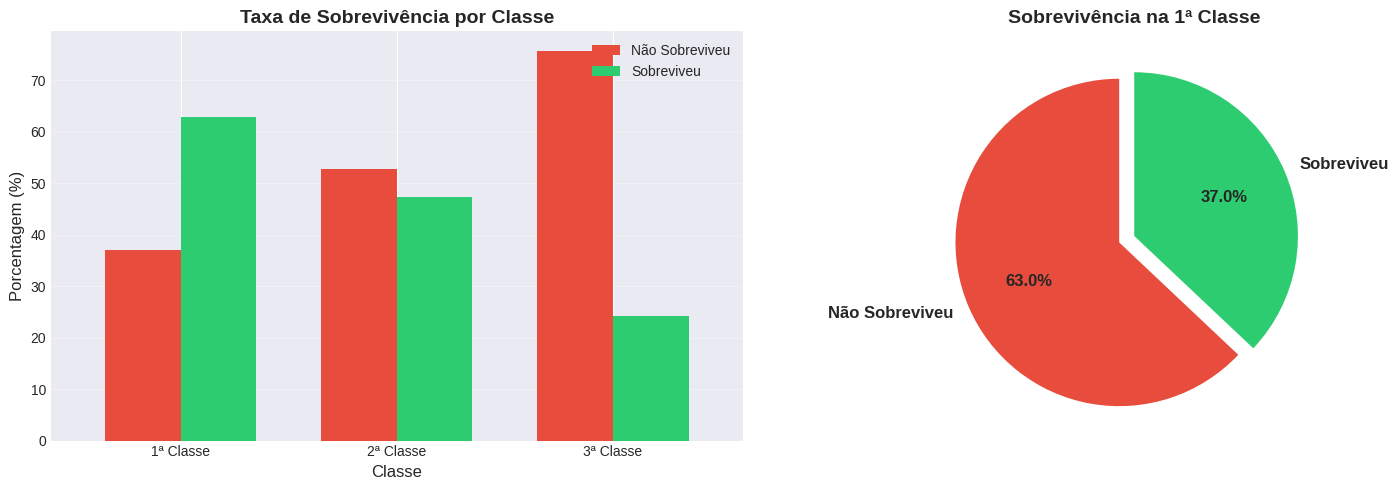


✅ Gráfico 1 salvo: grafico_1_sobrevivencia_classe.png


📊 DESAFIO 2: Distribuição de Passageiros por Sexo e Porto de Embarque
----------------------------------------------------------------------------------------------------

Total de homens: 577 (64.8%)
Total de mulheres: 314 (35.2%)


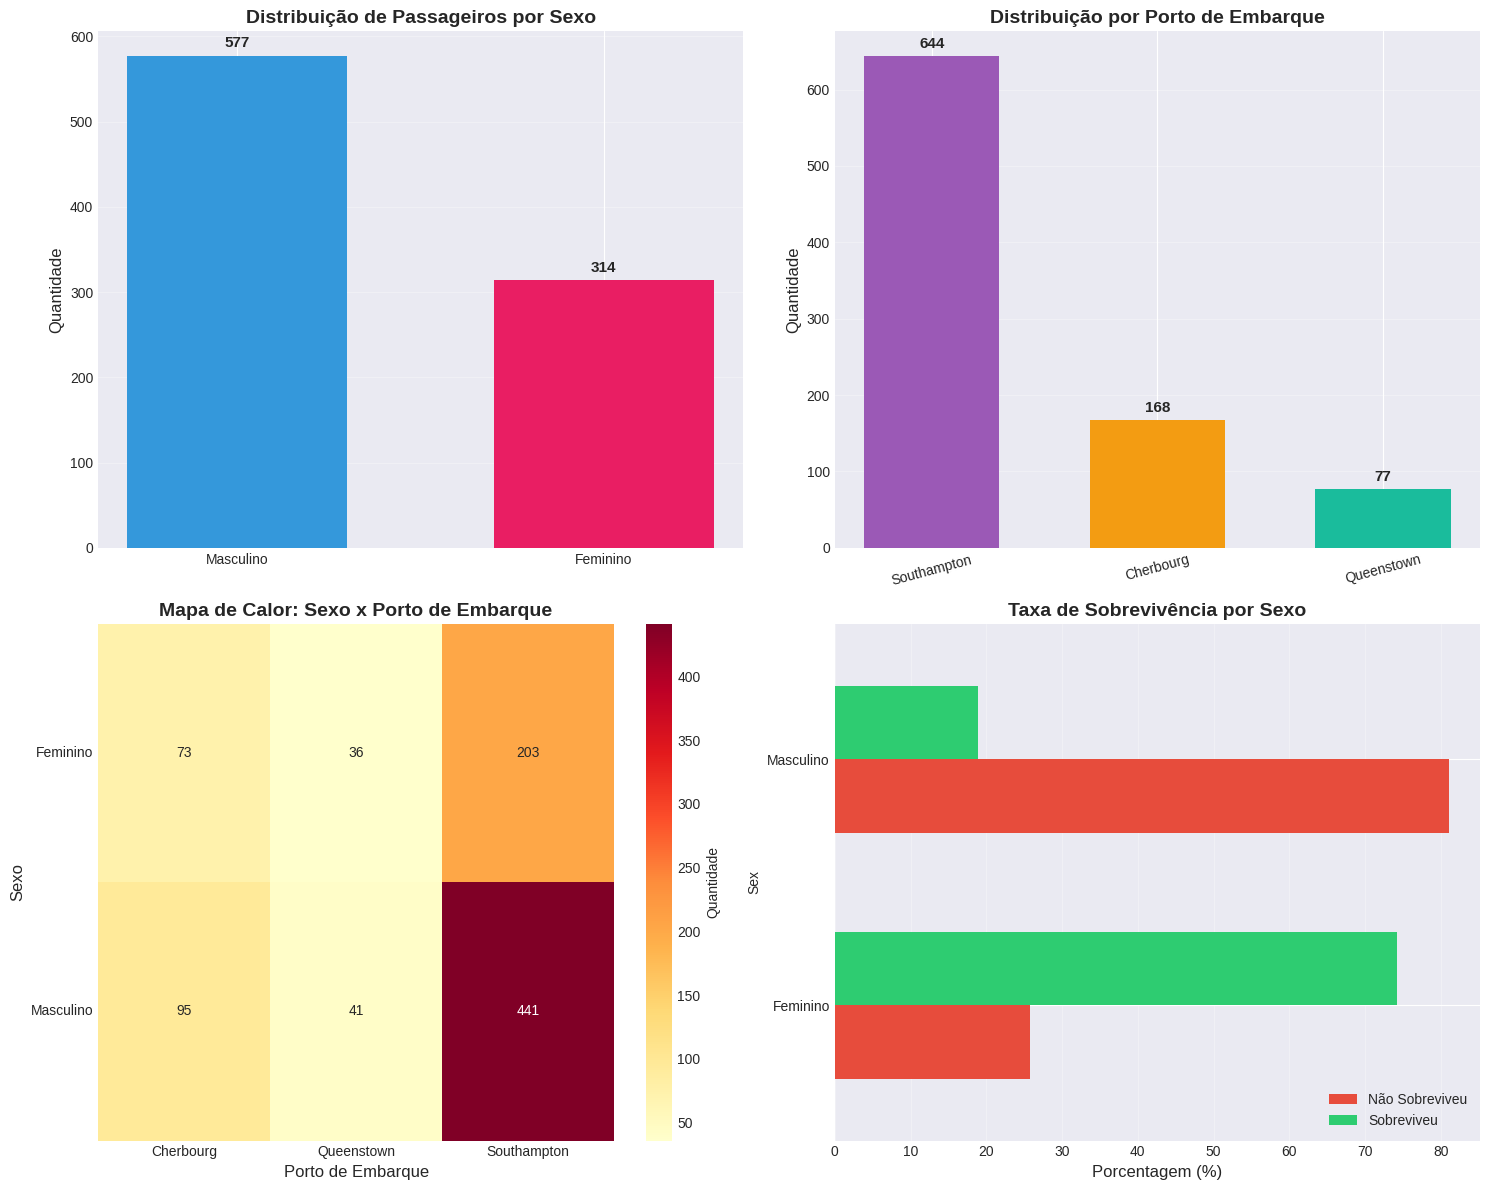

✅ Gráfico 2 salvo: grafico_2_distribuicao_sexo_porto.png


📊 DESAFIO 3: Comparação de Idade entre Sobreviventes e Não Sobreviventes
----------------------------------------------------------------------------------------------------

👤 Idade média dos SOBREVIVENTES: 28.34 anos
👤 Idade média dos NÃO SOBREVIVENTES: 30.63 anos


/tmp/ipython-input-1081803544.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrev_idade = df_titanic.groupby('Faixa_Etaria')['Survived'].mean() * 100


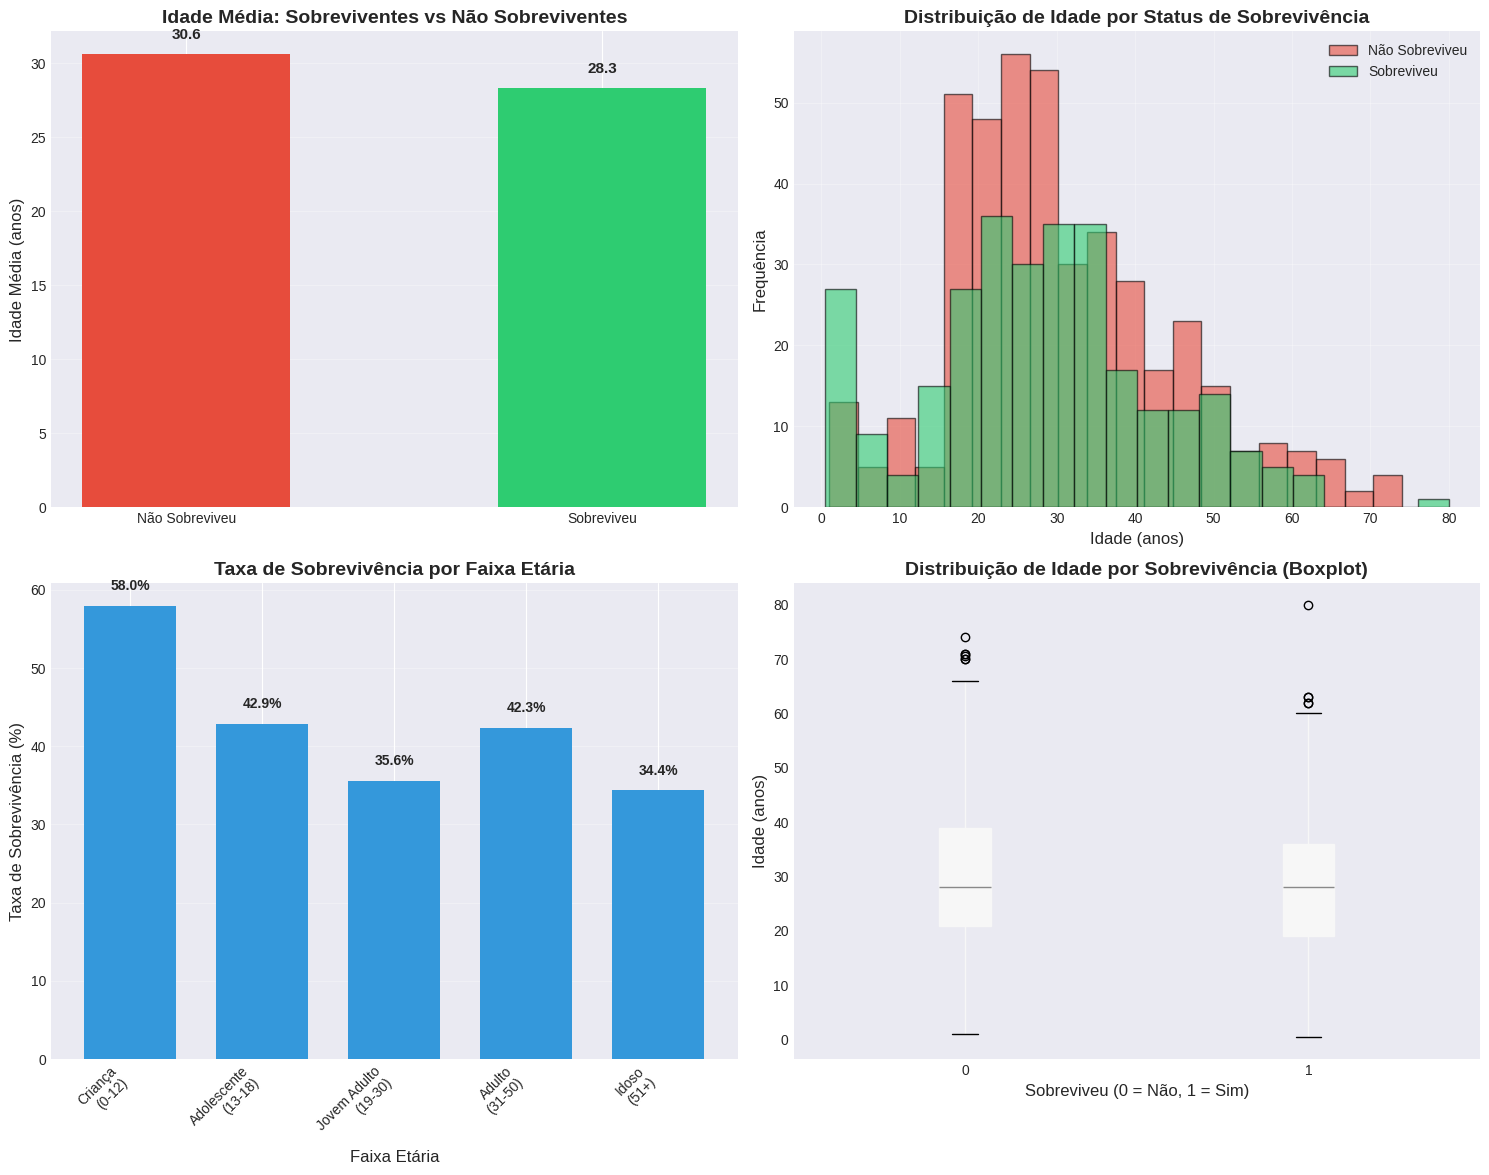

✅ Gráfico 3 salvo: grafico_3_analise_idade.png


🧹 PARTE 2: LIMPEZA E PRÉ-PROCESSAMENTO

✅ Nenhuma duplicata encontrada

🔍 Valores ausentes antes do tratamento:
Age             177
Cabin           687
Embarked          2
Faixa_Etaria    177
dtype: int64

✅ Valores ausentes tratados:
   - Age: preenchido com mediana (28.0)
   - Embarked: preenchido com moda ('S')
   - Cabin: marcado como 'Missing'


/tmp/ipython-input-1081803544.py:228: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['Age'].fillna(mediana_idade, inplace=True)
/tmp/ipython-input-1081803544.py:230: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

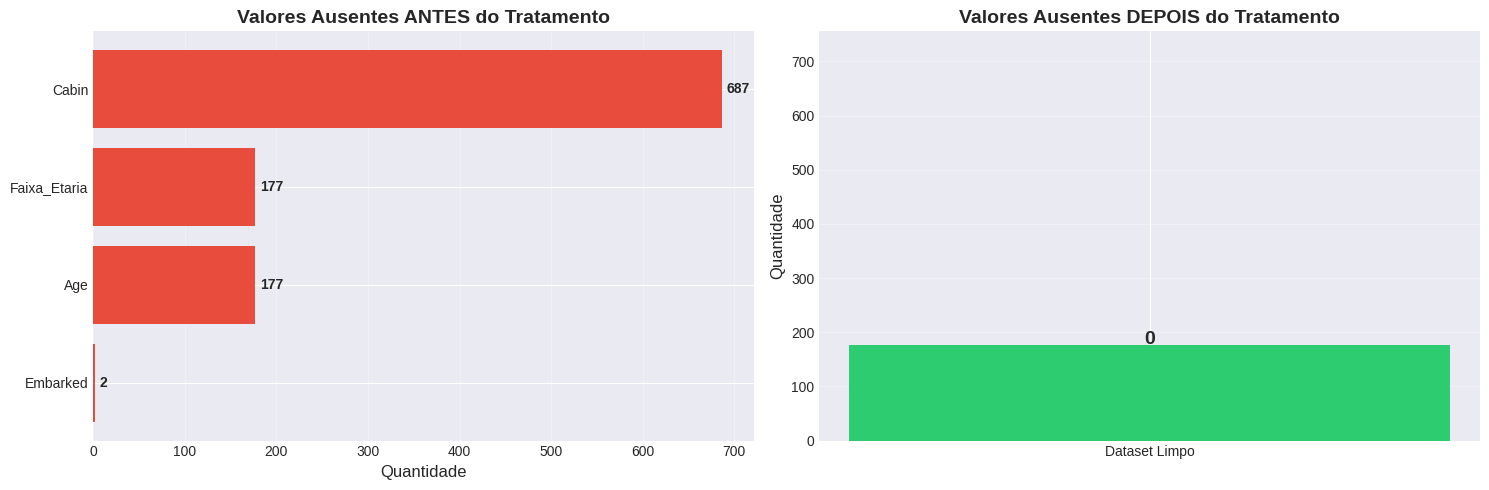

✅ Gráfico 4 salvo: grafico_4_valores_ausentes.png


🎯 DESAFIOS EXTRAS

🔍 EXTRA 1: Títulos encontrados nos nomes:
Titulo
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Rev         6
Col         2
Mlle        2
Major       2
Ms          1
Name: count, dtype: int64

🔍 EXTRA 2: Impacto de remover linhas com valores ausentes:
   Dataset original: 891 linhas
   Sem valores ausentes: 183 linhas
   Perda: 708 linhas (79.5%)

🔍 EXTRA 3: Taxa de Sobrevivência por Tamanho de Família:
   Tamanho 1: 30.4%
   Tamanho 2: 55.3%
   Tamanho 3: 57.8%
   Tamanho 4: 72.4%
   Tamanho 5: 20.0%
   Tamanho 6: 13.6%
   Tamanho 7: 33.3%
   Tamanho 8: 0.0%
   Tamanho 11: 0.0%


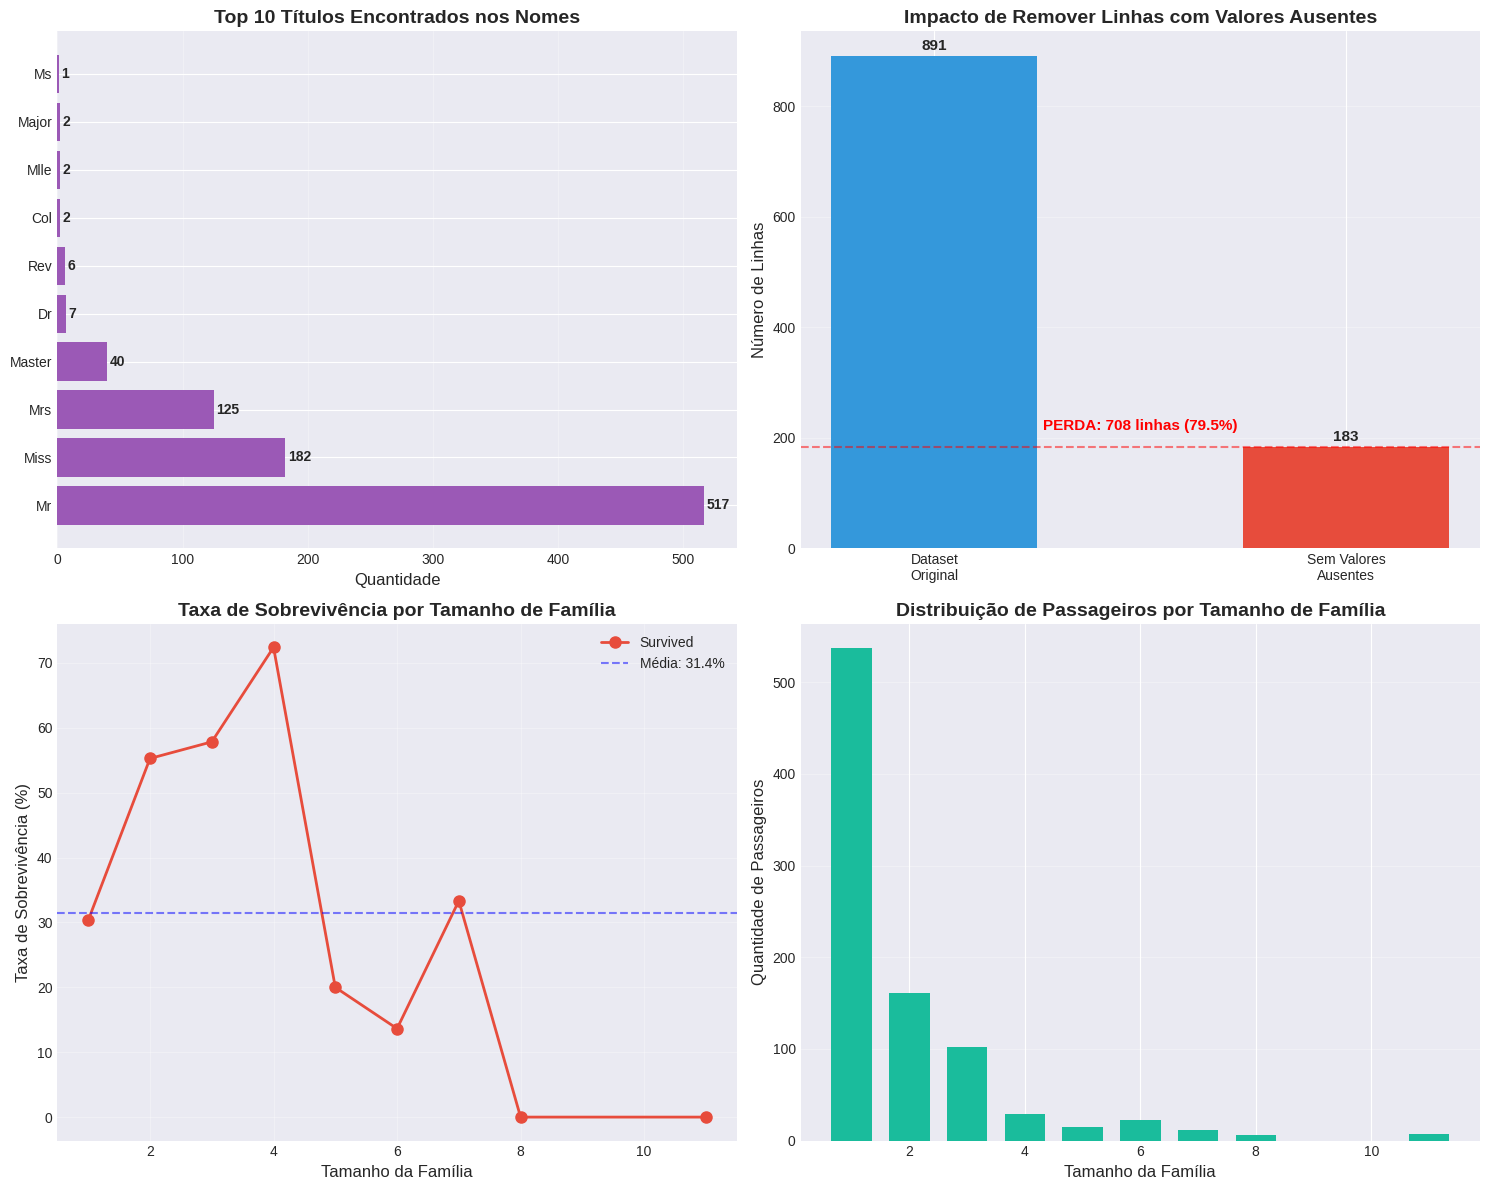

✅ Gráfico 5 salvo: grafico_5_desafios_extras.png

✅ ANÁLISE COMPLETA FINALIZADA COM TODOS OS GRÁFICOS!
📊 5 arquivos de gráficos salvos em alta resolução (300 DPI)


In [16]:
"""
🚢 Desafios Titanic - Análise Completa com Visualizações
Análise de Dados e Pré-processamento
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Carregar os dados
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("=" * 100)
print("🎯 PARTE 1: DESAFIOS DE ANÁLISE EXPLORATÓRIA")
print("=" * 100)

# ============================================================================
# DESAFIO 1: Passageiros da 1ª classe que não sobreviveram
# ============================================================================
print("\n📊 DESAFIO 1: Análise de Mortalidade na 1ª Classe")
print("-" * 100)

# Filtrar passageiros da 1ª classe que não sobreviveram
primeira_classe_mortos = df_titanic[(df_titanic['Pclass'] == 1) & (df_titanic['Survived'] == 0)]
total_primeira_classe = len(df_titanic[df_titanic['Pclass'] == 1])
porcentagem_mortos_1classe = (len(primeira_classe_mortos) / total_primeira_classe) * 100

print(f"\n📌 Passageiros da 1ª Classe que NÃO sobreviveram: {len(primeira_classe_mortos)}")
print(f"📌 Total de passageiros da 1ª Classe: {total_primeira_classe}")
print(f"📌 Porcentagem de mortalidade na 1ª Classe: {porcentagem_mortos_1classe:.2f}%")

# GRÁFICO 1: Taxa de Sobrevivência por Classe
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras - Sobrevivência por Classe
sobrev_classe = df_titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
sobrev_classe.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'], width=0.7)
axes[0].set_title('Taxa de Sobrevivência por Classe', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classe', fontsize=12)
axes[0].set_ylabel('Porcentagem (%)', fontsize=12)
axes[0].set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe'], rotation=0)
axes[0].legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pizza - 1ª Classe específica
primeira_classe_status = df_titanic[df_titanic['Pclass'] == 1]['Survived'].value_counts()
colors = ['#e74c3c', '#2ecc71']
explode = (0.1, 0)
axes[1].pie(primeira_classe_status, labels=['Não Sobreviveu', 'Sobreviveu'],
            autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Sobrevivência na 1ª Classe', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('grafico_1_sobrevivencia_classe.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico 1 salvo: grafico_1_sobrevivencia_classe.png")

# ============================================================================
# DESAFIO 2: Distribuição por Sexo e Porto de Embarque
# ============================================================================
print("\n\n📊 DESAFIO 2: Distribuição de Passageiros por Sexo e Porto de Embarque")
print("-" * 100)

sexo_count = df_titanic['Sex'].value_counts()
embarque_count = df_titanic['Embarked'].value_counts()

print(f"\nTotal de homens: {sexo_count['male']} ({sexo_count['male']/len(df_titanic)*100:.1f}%)")
print(f"Total de mulheres: {sexo_count['female']} ({sexo_count['female']/len(df_titanic)*100:.1f}%)")

# GRÁFICO 2: Distribuição por Sexo e Porto
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 2.1 - Distribuição por Sexo
axes[0, 0].bar(['Masculino', 'Feminino'], [sexo_count['male'], sexo_count['female']],
               color=['#3498db', '#e91e63'], width=0.6)
axes[0, 0].set_title('Distribuição de Passageiros por Sexo', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Quantidade', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate([sexo_count['male'], sexo_count['female']]):
    axes[0, 0].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=11)

# 2.2 - Distribuição por Porto de Embarque
portos_labels = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
embarque_valores = [embarque_count.get(k, 0) for k in ['S', 'C', 'Q']]
axes[0, 1].bar([portos_labels[k] for k in ['S', 'C', 'Q']], embarque_valores,
               color=['#9b59b6', '#f39c12', '#1abc9c'], width=0.6)
axes[0, 1].set_title('Distribuição por Porto de Embarque', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Quantidade', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(embarque_valores):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=11)

# 2.3 - Heatmap: Sexo x Porto de Embarque
cruzamento = pd.crosstab(df_titanic['Sex'], df_titanic['Embarked'])
sns.heatmap(cruzamento, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 0],
            cbar_kws={'label': 'Quantidade'})
axes[1, 0].set_title('Mapa de Calor: Sexo x Porto de Embarque', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Porto de Embarque', fontsize=12)
axes[1, 0].set_ylabel('Sexo', fontsize=12)
axes[1, 0].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
axes[1, 0].set_yticklabels(['Feminino', 'Masculino'], rotation=0)

# 2.4 - Sobrevivência por Sexo
sobrev_sexo = df_titanic.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
sobrev_sexo.plot(kind='barh', ax=axes[1, 1], color=['#e74c3c', '#2ecc71'], width=0.6)
axes[1, 1].set_title('Taxa de Sobrevivência por Sexo', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Porcentagem (%)', fontsize=12)
axes[1, 1].set_yticklabels(['Feminino', 'Masculino'], rotation=0)
axes[1, 1].legend(['Não Sobreviveu', 'Sobreviveu'], loc='lower right')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_2_distribuicao_sexo_porto.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 2 salvo: grafico_2_distribuicao_sexo_porto.png")

# ============================================================================
# DESAFIO 3: Idade Média dos Sobreviventes vs Não Sobreviventes
# ============================================================================
print("\n\n📊 DESAFIO 3: Comparação de Idade entre Sobreviventes e Não Sobreviventes")
print("-" * 100)

idade_sobreviventes = df_titanic[df_titanic['Survived'] == 1]['Age'].mean()
idade_nao_sobreviventes = df_titanic[df_titanic['Survived'] == 0]['Age'].mean()

print(f"\n👤 Idade média dos SOBREVIVENTES: {idade_sobreviventes:.2f} anos")
print(f"👤 Idade média dos NÃO SOBREVIVENTES: {idade_nao_sobreviventes:.2f} anos")

# Criar faixas etárias
df_titanic['Faixa_Etaria'] = pd.cut(df_titanic['Age'],
                                     bins=[0, 12, 18, 30, 50, 100],
                                     labels=['Criança\n(0-12)', 'Adolescente\n(13-18)',
                                             'Jovem Adulto\n(19-30)', 'Adulto\n(31-50)',
                                             'Idoso\n(51+)'])

# GRÁFICO 3: Análise de Idade
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 3.1 - Comparação de Média de Idade
idades_medias = [idade_nao_sobreviventes, idade_sobreviventes]
axes[0, 0].bar(['Não Sobreviveu', 'Sobreviveu'], idades_medias,
               color=['#e74c3c', '#2ecc71'], width=0.5)
axes[0, 0].set_title('Idade Média: Sobreviventes vs Não Sobreviventes',
                     fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Idade Média (anos)', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(idades_medias):
    axes[0, 0].text(i, v + 1, f'{v:.1f}', ha='center', fontweight='bold', fontsize=11)

# 3.2 - Distribuição de Idade (Histograma)
df_titanic[df_titanic['Survived'] == 0]['Age'].hist(ax=axes[0, 1], bins=20,
                                                     alpha=0.6, color='#e74c3c',
                                                     label='Não Sobreviveu', edgecolor='black')
df_titanic[df_titanic['Survived'] == 1]['Age'].hist(ax=axes[0, 1], bins=20,
                                                     alpha=0.6, color='#2ecc71',
                                                     label='Sobreviveu', edgecolor='black')
axes[0, 1].set_title('Distribuição de Idade por Status de Sobrevivência',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Idade (anos)', fontsize=12)
axes[0, 1].set_ylabel('Frequência', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3.3 - Taxa de Sobrevivência por Faixa Etária
sobrev_idade = df_titanic.groupby('Faixa_Etaria')['Survived'].mean() * 100
sobrev_idade.plot(kind='bar', ax=axes[1, 0], color='#3498db', width=0.7)
axes[1, 0].set_title('Taxa de Sobrevivência por Faixa Etária',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Taxa de Sobrevivência (%)', fontsize=12)
axes[1, 0].set_xlabel('Faixa Etária', fontsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sobrev_idade):
    axes[1, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)

# 3.4 - Boxplot de Idade por Sobrevivência
df_titanic.boxplot(column='Age', by='Survived', ax=axes[1, 1],
                   patch_artist=True, grid=False)
axes[1, 1].set_title('Distribuição de Idade por Sobrevivência (Boxplot)',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sobreviveu (0 = Não, 1 = Sim)', fontsize=12)
axes[1, 1].set_ylabel('Idade (anos)', fontsize=12)
plt.suptitle('')  # Remove título automático do boxplot

plt.tight_layout()
plt.savefig('grafico_3_analise_idade.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 3 salvo: grafico_3_analise_idade.png")

# ============================================================================
# LIMPEZA E PRÉ-PROCESSAMENTO
# ============================================================================
print("\n\n" + "=" * 100)
print("🧹 PARTE 2: LIMPEZA E PRÉ-PROCESSAMENTO")
print("=" * 100)

# Duplicatas
num_duplicatas = df_titanic.duplicated().sum()
if num_duplicatas > 0:
    df_limpo = df_titanic.drop_duplicates().copy()
    print(f"\n⚠️  Duplicatas removidas: {num_duplicatas}")
else:
    df_limpo = df_titanic.copy()
    print(f"\n✅ Nenhuma duplicata encontrada")

# Valores ausentes
print("\n🔍 Valores ausentes antes do tratamento:")
valores_ausentes_antes = df_limpo.isnull().sum()
print(valores_ausentes_antes[valores_ausentes_antes > 0])

# Tratamento
mediana_idade = df_limpo['Age'].median()
df_limpo['Age'].fillna(mediana_idade, inplace=True)
moda_embarque = df_limpo['Embarked'].mode()[0]
df_limpo['Embarked'].fillna(moda_embarque, inplace=True)
df_limpo['Cabin'].fillna('Missing', inplace=True)

print(f"\n✅ Valores ausentes tratados:")
print(f"   - Age: preenchido com mediana ({mediana_idade:.1f})")
print(f"   - Embarked: preenchido com moda ('{moda_embarque}')")
print(f"   - Cabin: marcado como 'Missing'")

# GRÁFICO 4: Valores Ausentes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 4.1 - Antes do tratamento
valores_ausentes_antes_top = valores_ausentes_antes[valores_ausentes_antes > 0].sort_values(ascending=True)
axes[0].barh(range(len(valores_ausentes_antes_top)), valores_ausentes_antes_top.values,
             color='#e74c3c')
axes[0].set_yticks(range(len(valores_ausentes_antes_top)))
axes[0].set_yticklabels(valores_ausentes_antes_top.index)
axes[0].set_title('Valores Ausentes ANTES do Tratamento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantidade', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(valores_ausentes_antes_top.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# 4.2 - Depois do tratamento
valores_ausentes_depois = df_limpo.isnull().sum()
axes[1].bar(['Dataset Limpo'], [valores_ausentes_depois.sum()], color='#2ecc71', width=0.4)
axes[1].set_title('Valores Ausentes DEPOIS do Tratamento', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Quantidade', fontsize=12)
axes[1].text(0, valores_ausentes_depois.sum() + 0.5, '0', ha='center',
             fontweight='bold', fontsize=14)
axes[1].set_ylim(0, max(valores_ausentes_antes_top.values) * 1.1)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_4_valores_ausentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 4 salvo: grafico_4_valores_ausentes.png")

# ============================================================================
# DESAFIOS EXTRAS
# ============================================================================
print("\n\n" + "=" * 100)
print("🎯 DESAFIOS EXTRAS")
print("=" * 100)

# EXTRA 1: Títulos nos nomes
df_limpo['Titulo'] = df_limpo['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("\n🔍 EXTRA 1: Títulos encontrados nos nomes:")
print(df_limpo['Titulo'].value_counts().head(10))

# EXTRA 2: Impacto de remover linhas com ausentes
df_original = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df_sem_ausentes = df_original.dropna()
linhas_perdidas = df_original.shape[0] - df_sem_ausentes.shape[0]

print(f"\n🔍 EXTRA 2: Impacto de remover linhas com valores ausentes:")
print(f"   Dataset original: {df_original.shape[0]} linhas")
print(f"   Sem valores ausentes: {df_sem_ausentes.shape[0]} linhas")
print(f"   Perda: {linhas_perdidas} linhas ({linhas_perdidas/df_original.shape[0]*100:.1f}%)")

# EXTRA 3: FamilySize
df_limpo['FamilySize'] = df_limpo['SibSp'] + df_limpo['Parch'] + 1
sobrevivencia_familia = df_limpo.groupby('FamilySize')['Survived'].mean() * 100

print(f"\n🔍 EXTRA 3: Taxa de Sobrevivência por Tamanho de Família:")
for size, rate in sobrevivencia_familia.items():
    print(f"   Tamanho {size}: {rate:.1f}%")

# GRÁFICO 5: Desafios Extras
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 5.1 - Top 10 Títulos
top_titulos = df_limpo['Titulo'].value_counts().head(10)
axes[0, 0].barh(range(len(top_titulos)), top_titulos.values, color='#9b59b6')
axes[0, 0].set_yticks(range(len(top_titulos)))
axes[0, 0].set_yticklabels(top_titulos.index)
axes[0, 0].set_title('Top 10 Títulos Encontrados nos Nomes', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Quantidade', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(top_titulos.values):
    axes[0, 0].text(v + 2, i, str(v), va='center', fontweight='bold')

# 5.2 - Impacto de remover ausentes
dados_comparacao = [df_original.shape[0], df_sem_ausentes.shape[0]]
axes[0, 1].bar(['Dataset\nOriginal', 'Sem Valores\nAusentes'], dados_comparacao,
               color=['#3498db', '#e74c3c'], width=0.5)
axes[0, 1].set_title('Impacto de Remover Linhas com Valores Ausentes',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Número de Linhas', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(dados_comparacao):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold', fontsize=11)
axes[0, 1].axhline(y=df_sem_ausentes.shape[0], color='red', linestyle='--', alpha=0.5)
axes[0, 1].text(0.5, df_sem_ausentes.shape[0] + 30,
                f'PERDA: {linhas_perdidas} linhas ({linhas_perdidas/df_original.shape[0]*100:.1f}%)',
                ha='center', color='red', fontweight='bold', fontsize=11)

# 5.3 - FamilySize e Sobrevivência
sobrevivencia_familia.plot(kind='line', ax=axes[1, 0], marker='o', color='#e74c3c',
                           linewidth=2, markersize=8)
axes[1, 0].set_title('Taxa de Sobrevivência por Tamanho de Família',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tamanho da Família', fontsize=12)
axes[1, 0].set_ylabel('Taxa de Sobrevivência (%)', fontsize=12)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].axhline(y=sobrevivencia_familia.mean(), color='blue', linestyle='--',
                   alpha=0.5, label=f'Média: {sobrevivencia_familia.mean():.1f}%')
axes[1, 0].legend()

# 5.4 - Distribuição de FamilySize
family_counts = df_limpo['FamilySize'].value_counts().sort_index()
axes[1, 1].bar(family_counts.index, family_counts.values, color='#1abc9c', width=0.7)
axes[1, 1].set_title('Distribuição de Passageiros por Tamanho de Família',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Tamanho da Família', fontsize=12)
axes[1, 1].set_ylabel('Quantidade de Passageiros', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_5_desafios_extras.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 5 salvo: grafico_5_desafios_extras.png")

print("\n" + "=" * 100)
print("✅ ANÁLISE COMPLETA FINALIZADA COM TODOS OS GRÁFICOS!")
print("📊 5 arquivos de gráficos salvos em alta resolução (300 DPI)")
print("=" * 100)